<a href="https://colab.research.google.com/github/sohaibwaheedgithub/Machine-Learning-And-Deep-Learning-Projects/blob/main/Digits_Classification_With_LeNet_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries

import tensorflow as tf
import tensorflow.keras as keras 
import matplotlib.pyplot as plt
from functools import partial
import numpy as np

In [ ]:
# Fetching MNIST dataset from keras.datasets

(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Preprocessing data

# Scaling and Padding images because LeNet expects inputs of shape 32 * 32 
# which ranges from 0 to 1
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255


# Expanding dimensions to include channel dimension because keras
# expects so
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)

# Extracting validation set from train set
x_val = x_train[-2000:,:,:,:] 
y_val = y_train[-2000:] 
x_train = x_train[:-2000,:,:,:] 
y_train = y_train[:-2000]

In [ ]:
# Building LeNet CNN Architecture


Conv2D = partial(
    keras.layers.Conv2D,
    kernel_size = 5,
    activation = 'tanh'
)

AvgPool2D = partial(
    keras.layers.AvgPool2D
)

model = keras.models.Sequential(
    [
     Conv2D(6, input_shape = [32, 32, 1]),
     AvgPool2D(2),
     keras.layers.Activation('tanh'),
     Conv2D(16),
     AvgPool2D(2),
     keras.layers.Activation('tanh'),
     Conv2D(120),
     keras.layers.Flatten(),
     keras.layers.Dense(84, activation = 'tanh'),
     keras.layers.Dense(10, activation = 'softmax')
    ]
)

In [ ]:
# Compilation of model
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = keras.optimizers.SGD(momentum = 0.9),
              metrics = ['accuracy']
              )


# Creating callback to implement early stopping 
earlystopping_cb = keras.callbacks.EarlyStopping(patience = 10,
                                                 restore_best_weights=True
                                                 )
# Training the model
history = model.fit(x_train, y_train,
                    epochs = 40,
                    validation_data = (x_val, y_val),
                    callbacks = [earlystopping_cb]
                    )

Epoch 1/40
1813/1813 [==============================] - 39s 21ms/step - loss: 0.2686 - accuracy: 0.9190 - val_loss: 0.0868 - val_accuracy: 0.9750
Epoch 2/40
1813/1813 [==============================] - 39s 21ms/step - loss: 0.0859 - accuracy: 0.9741 - val_loss: 0.0645 - val_accuracy: 0.9835
Epoch 3/40
1813/1813 [==============================] - 39s 22ms/step - loss: 0.0597 - accuracy: 0.9813 - val_loss: 0.0512 - val_accuracy: 0.9865
Epoch 4/40
1813/1813 [==============================] - 38s 21ms/step - loss: 0.0443 - accuracy: 0.9859 - val_loss: 0.0456 - val_accuracy: 0.9880
Epoch 5/40
1813/1813 [==============================] - 38s 21ms/step - loss: 0.0361 - accuracy: 0.9883 - val_loss: 0.0519 - val_accuracy: 0.9865
Epoch 6/40
1813/1813 [==============================] - 38s 21ms/step - loss: 0.0300 - accuracy: 0.9910 - val_loss: 0.0453 - val_accuracy: 0.9890
Epoch 7/40
1813/1813 [==============================] - 38s 21ms/step - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.0435 -

In [ ]:
# Evaluating the model on test set 

model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0352 - accuracy: 0.9883


[0.03524944558739662, 0.9883000254631042]

In [ ]:
'''
As we can see the model is working with 98.83 % accuracy with only
0.011 % generalization error
'''

In [ ]:
x_test.shape

TensorShape([10000, 32, 32, 1])

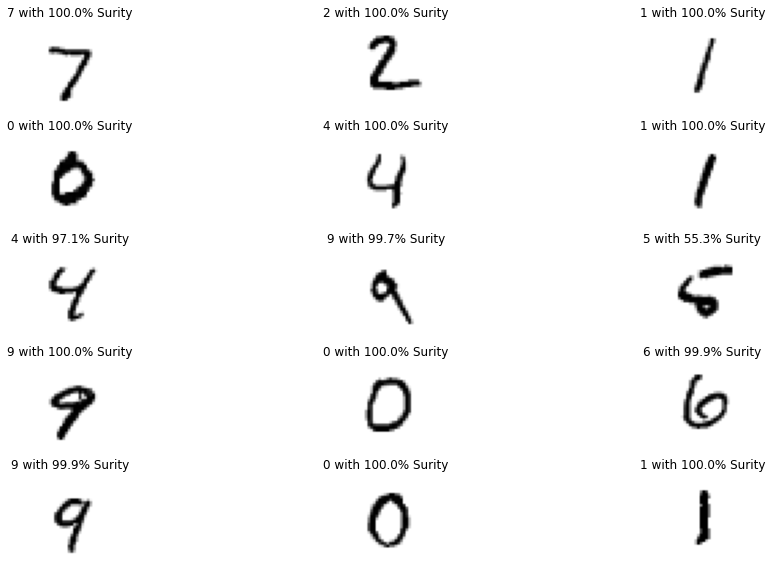

In [ ]:
# Displaying some predictions 

labs = model.predict(x_test[:15])
indices = np.argmax(labs, axis = 1)

fig = plt.figure(figsize=(15, 8))
for idx, img in enumerate(x_test[:15]):
  fig.add_subplot(5, 3, idx+1)
  image = tf.reshape(img, [32, 32])
  plt.imshow(image, cmap = 'gray_r')
  plt.axis('off')
  plt.title('{} with {:.01f}% Surity'.format(indices[idx], labs[idx][indices[idx]] * 100))
plt.tight_layout()

In [ ]:
'''
Great the model has predicted all labels correctly,
and most of them with 100% surity
'''